In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm

import stable_nalu

from RLfunctions import *
from NAU_RL import *

# A2C test

In [3]:
# We load CartPole-v1
env = gym.make('CartPole-v1')
# We wrap it in order to save our experiment on a file.
# env = Monitor(env, "./gym-results", force=True)

In [4]:
env.reset()

array([ 0.04476103,  0.01527813,  0.03120175, -0.00666392])

In [5]:
done = False
obs = env.reset()
while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
env.close()
# show_video("./gym-results")

In [8]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


Epoch 0/1000: Mean rewards: 19.86, Std: 9.84
Epoch 50/1000: Mean rewards: 29.72, Std: 14.12
Epoch 100/1000: Mean rewards: 49.22, Std: 21.84
Epoch 150/1000: Mean rewards: 71.0, Std: 43.98
Epoch 200/1000: Mean rewards: 127.32, Std: 66.05
Epoch 250/1000: Mean rewards: 227.68, Std: 98.54
Epoch 300/1000: Mean rewards: 171.5, Std: 52.76
Epoch 350/1000: Mean rewards: 243.54, Std: 96.6
Epoch 400/1000: Mean rewards: 292.16, Std: 114.83
Epoch 450/1000: Mean rewards: 375.92, Std: 118.82
Epoch 500/1000: Mean rewards: 406.0, Std: 107.45
Epoch 550/1000: Mean rewards: 406.9, Std: 94.07
Epoch 600/1000: Mean rewards: 425.96, Std: 90.8
Epoch 650/1000: Mean rewards: 430.36, Std: 95.74
Epoch 700/1000: Mean rewards: 410.96, Std: 103.09
Epoch 750/1000: Mean rewards: 442.92, Std: 95.76
Epoch 800/1000: Mean rewards: 449.72, Std: 103.0
Epoch 850/1000: Mean rewards: 474.68, Std: 65.76
Epoch 900/1000: Mean rewards: 483.22, Std: 63.72
Epoch 950/1000: Mean rewards: 462.56, Std: 91.68
Epoch 999/1000: Mean rewards: 

<IPython.core.display.Javascript object>


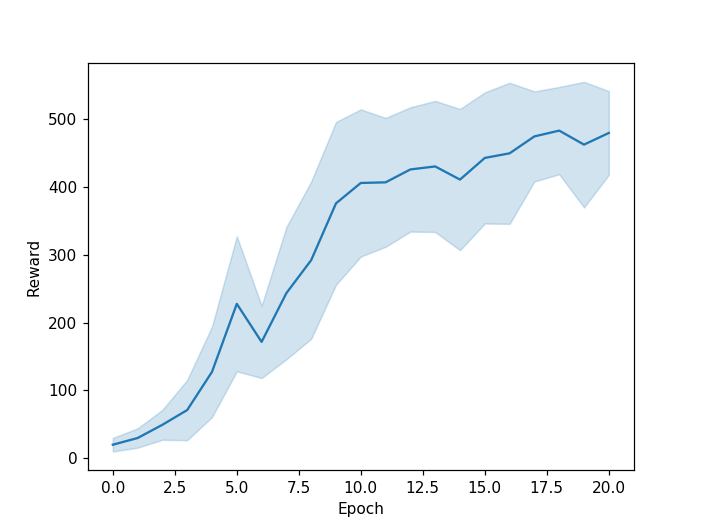

The trainnig was done over a total of 1780 episodes


In [29]:
agent = A2CAgent(config_a2c)
rewards = agent.training_batch(1000, 256)

In [33]:
agent.evaluate(render=True)

Reward: 500.0


500.0

# Training with random mass

In [5]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


Epoch 0/1000: Mean rewards: 22.82, Std: 10.64
Epoch 50/1000: Mean rewards: 34.94, Std: 18.3
Epoch 100/1000: Mean rewards: 57.3, Std: 31.81
Epoch 150/1000: Mean rewards: 119.84, Std: 80.03
Epoch 200/1000: Mean rewards: 155.64, Std: 55.7
Epoch 250/1000: Mean rewards: 248.24, Std: 114.74
Epoch 300/1000: Mean rewards: 292.92, Std: 136.28
Epoch 350/1000: Mean rewards: 323.82, Std: 126.6
Epoch 400/1000: Mean rewards: 357.94, Std: 115.53
Epoch 450/1000: Mean rewards: 395.98, Std: 106.74
Epoch 500/1000: Mean rewards: 248.38, Std: 69.47
Epoch 550/1000: Mean rewards: 445.48, Std: 83.39
Epoch 600/1000: Mean rewards: 445.7, Std: 81.67
Epoch 650/1000: Mean rewards: 445.08, Std: 106.29
Epoch 700/1000: Mean rewards: 467.58, Std: 74.4
Epoch 750/1000: Mean rewards: 463.44, Std: 81.36
Epoch 800/1000: Mean rewards: 459.58, Std: 96.22
Epoch 850/1000: Mean rewards: 444.52, Std: 93.33
Epoch 900/1000: Mean rewards: 459.62, Std: 81.48
Epoch 950/1000: Mean rewards: 496.82, Std: 15.69
Early stopping !


<IPython.core.display.Javascript object>


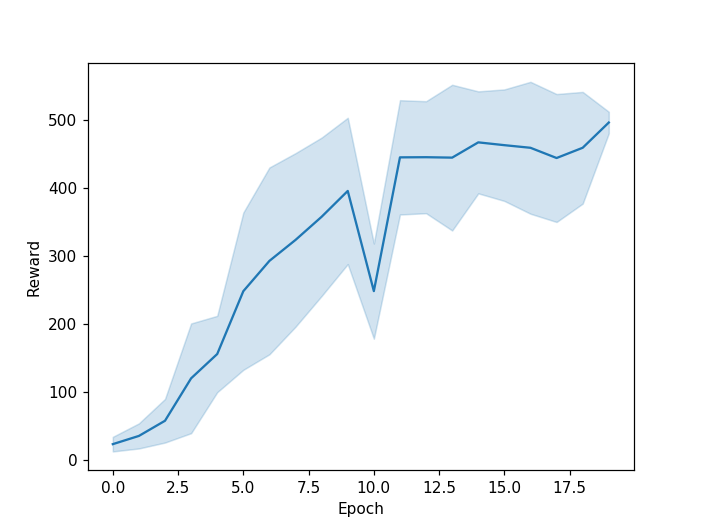

The trainnig was done over a total of 1431 episodes


In [6]:
agent = A2CAgentRandom(config_a2c, range_train=(0.05, 0.2), range_eval=(0.05, 0.2))
rewards = agent.training_batch(1000, 256)

In [7]:
def eval_agent(agent, n_eval, min_mass, max_mass):
    rws = []
    for _ in tqdm.tqdm_notebook(range(n_eval)):
        r = agent.evaluate(min_mass, max_mass)
        rws.append(r)
    rws = np.array(rws)
    print(f'Mean success : {rws.mean():.2f} +- {rws.std():.2f}')

In [8]:
eval_agent(agent, 100, 0.05, 0.2)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 487.68 +- 42.30


In [12]:
eval_agent(agent, 100, 0.2, 0.5)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 478.49 +- 58.00


In [9]:
eval_agent(agent, 100, 0.2, 1)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 451.28 +- 89.90


In [10]:
eval_agent(agent, 100, 0.5, 2)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 184.08 +- 206.71


In [11]:
eval_agent(agent, 100, 1, 5)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



Mean success : 25.78 +- 58.29


# NAU agent

## Layers

In [31]:
l = stable_nalu.layer.GeneralizedLayer(5, 10, 'ReRegualizedLinearMNAC')

In [32]:
l

GeneralizedLayer(
  in_features=5, out_features=10, unit_name=ReRegualizedLinearMNAC
  (layer): ReRegualizedLinearMNACLayer(in_features=5, out_features=10)
)

In [33]:
l(torch.rand(16, 5)).shape

torch.Size([16, 10])

## RNN

### Functions

In [278]:
class ValueNetworkNAURNN(stable_nalu.abstract.ExtendedTorchModule):
    UNIT_NAMES = stable_nalu.layer.GeneralizedCell.UNIT_NAMES

    def __init__(self, unit_name, input_size=5, hidden_size=16, **kwargs):
        super().__init__('network', writer=None, **kwargs)

        self.unit_name = unit_name
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Since for the 'mul' problem, the zero_state should be 1, and for the
        # 'add' problem it should be 0. The zero_states are allowed to be
        # # optimized.
        if unit_name == 'LSTM':
            self.zero_state = torch.nn.ParameterDict({
                'h_t0': torch.nn.Parameter(torch.Tensor(self.hidden_size)),
                'c_t0': torch.nn.Parameter(torch.Tensor(self.hidden_size))
            })
        else:
            self.zero_state = torch.nn.Parameter(torch.Tensor(self.hidden_size))

        self.recurent_cell = stable_nalu.layer.GeneralizedCell(input_size, self.hidden_size,
                                             unit_name,
                                             writer=self.writer,
                                             name='recurrent_layer',
                                             **kwargs)
        self.output_layer = stable_nalu.layer.GeneralizedLayer(self.hidden_size, 1,
                                            'linear'
                                                if unit_name in {'GRU', 'LSTM', 'RNN-tanh', 'RNN-ReLU'}
                                                else unit_name,
                                             writer=self.writer,
                                             name='output_layer',
                                             **kwargs)
        self.reset_parameters()

    def reset_parameters(self):
        if self.unit_name == 'LSTM':
            for zero_state in self.zero_state.values():
                torch.nn.init.zeros_(zero_state)
        else:
            torch.nn.init.zeros_(self.zero_state)

        self.recurent_cell.reset_parameters()
        self.output_layer.reset_parameters()

    def forward(self, x):
        """Performs recurrent iterations over the input.

        Arguments:
            input: Expected to have the shape [obs, time, dims]
        """
        if len(x.size()) == 2:
            x = x[None]
        # Perform recurrent iterations over the input
        if self.unit_name == 'LSTM':
            h_tm1 = tuple(zero_state.repeat(x.size(0), 1) for zero_state in self.zero_state.values())
        else:
            h_tm1 = self.zero_state.repeat(x.size(0), 1)

        hs = []
        for t in range(x.size(1)):
            x_t = x[:, t]
            h_t = self.recurent_cell(x_t, h_tm1)
            h_tm1 = h_t
            hs.append(h_t)

        # Grap the final hidden output and use as the output from the recurrent layer
#         z_1 = h_t[0] if self.unit_name == 'LSTM' else h_t
        z = [x[0] if self.unit_name == 'LSTM' else x for x in hs]
#         z_2 = self.output_layer(z_1)
        z_2 = self.output_layer(torch.stack(z))
        return z_2

    def extra_repr(self):
        return 'unit_name={}, input_size={}'.format(
            self.unit_name, self.input_size
        )
    
    def predict(self, x):
        return self(x).detach().numpy()

In [279]:
VR = ValueNetworkNAURNN('ReRegualizedLinearMNAC')

In [280]:
VR(torch.rand(1, 200, 5)).shape

torch.Size([200, 1])

In [281]:
VR.predict(torch.rand(200, 5))

array([[2.4869887e-06],
       [2.4870126e-06],
       [2.4869582e-06],
       [2.4869546e-06],
       [2.4869601e-06],
       [2.4869312e-06],
       [2.4872702e-06],
       [2.4869012e-06],
       [2.4870947e-06],
       [2.4869253e-06],
       [2.4870726e-06],
       [2.4869662e-06],
       [2.4869037e-06],
       [2.4870192e-06],
       [2.4868966e-06],
       [2.4868771e-06],
       [2.4869339e-06],
       [2.4869769e-06],
       [2.4868914e-06],
       [2.4869955e-06],
       [2.4869169e-06],
       [2.4869341e-06],
       [2.4868607e-06],
       [2.4869876e-06],
       [2.4870126e-06],
       [2.4868677e-06],
       [2.4869921e-06],
       [2.4868757e-06],
       [2.4869059e-06],
       [2.4868543e-06],
       [2.4871088e-06],
       [2.4868746e-06],
       [2.4868730e-06],
       [2.4868978e-06],
       [2.4869737e-06],
       [2.4869173e-06],
       [2.4870071e-06],
       [2.4868766e-06],
       [2.4869544e-06],
       [2.4870842e-06],
       [2.4868746e-06],
       [2.487000

In [209]:
a = VR.regualizer()

In [214]:
a['W']

tensor(0.1034, grad_fn=<AddBackward0>)

In [252]:
hasattr(VR, 'regualizer')

True

In [350]:
class A2CAgentRNN(A2CAgentRandom):

    def __init__(self, config, range_train, range_eval, a_net, v_net, LSTM=False, reg=100):
        super(A2CAgentRNN, self).__init__(config, range_train, range_eval)
        self.value_network = v_net
        self.actor_network = a_net
        self.value_network_optimizer = optim.RMSprop(self.value_network.parameters(),
                                                     lr=config['value_network']['learning_rate'])
        self.actor_network_optimizer = optim.RMSprop(self.actor_network.parameters(),
                                                     lr=config['actor_network']['learning_rate'])
        self.recurrent = LSTM
        self.lambda_reg = reg
        
    def optimize_model(self, observations, actions, returns, advantages, nb_traj):
        # Optimize value function
        # MSE for the values
        Vs_current = self.value_network(torch.tensor(observations, dtype=torch.float)).flatten()
        loss_value = F.mse_loss(Vs_current, torch.tensor(returns, dtype=torch.float))
        if hasattr(self.value_network, 'regualizer'):
            loss_value += self.value_network.regualizer()['W']
        self.value_network_optimizer.zero_grad()
        loss_value.backward()
        self.value_network_optimizer.step()

        # Actor & Entropy loss
        Policies = self.actor_network(torch.tensor(observations, dtype=torch.float))
        Policies_action = torch.stack([x[actions[i]] for i, x in enumerate(Policies)])
        loss_action = - torch.sum(torch.tensor(advantages, dtype=torch.float) * torch.log(Policies_action) +  # actor
                                  0.001 * Policies_action * torch.log(Policies_action)) / nb_traj # entropy
        if hasattr(self.actor_network, 'regualizer'):
            loss_action += self.actor_network.regualizer()['W']
        self.actor_network_optimizer.zero_grad()
        loss_action.backward()
        self.actor_network_optimizer.step()
        
    def training_batch(self, epochs, batch_size):
        """Perform a training by batch

        Parameters
        ----------
        epochs : int
            Number of epochs
        batch_size : int
            The size of a batch
        """
        episode_count = 0
        actions = np.empty((batch_size,), dtype=np.int)
        dones = np.empty((batch_size,), dtype=np.bool)
        rewards, values = np.empty((2, batch_size), dtype=np.float)
        observations = np.empty((batch_size,) + (self.env.observation_space.shape[0]+1, ), dtype=np.float)
        observation = self.env.reset()
        rewards_test = []

        for epoch in range(epochs):
            # Lets collect one batch
            for i in range(batch_size):
                observations[i] = observation
                actions[i] = self.actor_network.select_action(torch.tensor(observations[i] , dtype=torch.float))
#                 values[i] = self.value_network.predict(torch.tensor(observations[i] , dtype=torch.float))
                # step
                observation, reward, done, _ = self.env.step(actions[i])
                if len(observation) == self.env.observation_space.shape[0]:
                    observation = np.insert(observation, len(observation), self.env.mass)
                dones[i] = done
                rewards[i] = reward
                if dones[i]:
                    observation = self.env.reset()
#                 print(self.env.mass)
            
            all_observe = torch.tensor(np.concatenate((observations, observation[None])), dtype=torch.float)
            all_values = self.value_network.predict(all_observe)
            values = all_values[:-1]

            # If our episode didn't end on the last step we need to compute the value for the last state
            if dones[-1]:
                next_value = 0
            else:
                next_value = all_values[-1]

            # Update episode_count
            episode_count += sum(dones)

            # Compute returns and advantages
            returns, advantages = self._returns_advantages(rewards, dones, values, next_value)

            # Learning step !
            self.optimize_model(observations, actions, returns, advantages, max(1, sum(dones)))

            # Test it every 50 epochs
            if epoch % 50 == 0 or epoch == epochs - 1:
                rewards_test.append(np.array([self.evaluate(*self.range_eval) for _ in range(50)]))
                print(f'Epoch {epoch}/{epochs}: Mean rewards: {round(rewards_test[-1].mean(), 2)}, Std: {round(rewards_test[-1].std(), 2)}')

                # Early stopping
                if rewards_test[-1].mean() > 490 and epoch != epochs -1:
                    print('Early stopping !')
                    break
                observation = self.env.reset()
                    
        # Plotting
        plt.figure()
        r = pd.DataFrame((itertools.chain(*(itertools.product([i], rewards_test[i]) for i in range(len(rewards_test))))), columns=['Epoch', 'Reward'])
        sns.lineplot(x="Epoch", y="Reward", data=r, ci='sd')
        
        print(f'The training was done over a total of {episode_count} episodes')

### Training

In [259]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


In [282]:
a_net = ActorNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, agent.env.action_space.n)
# v_net = ValueNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, 1)
v_net = ValueNetworkNAURNN('ReRegualizedLinearMNAC', input_size=5, hidden_size=16)

In [283]:
agent = A2CAgentRNN(config_a2c, range_train=(0.05, 0.2), range_eval=(0.05, 0.2),
                    a_net=a_net, v_net=v_net, LSTM=True, reg=100)
# agent = A2CAgentRNN(config_a2c, range_train=(0.05, 0.2), range_eval=(0.05, 0.2),
#                     a_net=a_net, v_net=v_net, LSTM=False, reg=100)

Epoch 0/1000: Mean rewards: 18.3, Std: 7.45
Epoch 50/1000: Mean rewards: 53.56, Std: 27.02
Epoch 100/1000: Mean rewards: 106.56, Std: 54.58
Epoch 150/1000: Mean rewards: 225.8, Std: 110.97
Epoch 200/1000: Mean rewards: 200.88, Std: 101.24
Epoch 250/1000: Mean rewards: 310.2, Std: 136.16
Epoch 300/1000: Mean rewards: 317.36, Std: 129.57
Epoch 350/1000: Mean rewards: 308.86, Std: 144.96
Epoch 400/1000: Mean rewards: 374.38, Std: 139.84
Epoch 450/1000: Mean rewards: 356.18, Std: 141.48
Epoch 500/1000: Mean rewards: 359.6, Std: 152.46
Epoch 550/1000: Mean rewards: 381.22, Std: 149.11
Epoch 600/1000: Mean rewards: 428.58, Std: 112.55
Epoch 650/1000: Mean rewards: 451.4, Std: 94.26
Epoch 700/1000: Mean rewards: 477.84, Std: 74.46
Epoch 750/1000: Mean rewards: 457.76, Std: 102.87
Epoch 800/1000: Mean rewards: 464.34, Std: 87.82
Epoch 850/1000: Mean rewards: 459.68, Std: 105.16
Epoch 900/1000: Mean rewards: 399.42, Std: 108.18
Epoch 950/1000: Mean rewards: 485.22, Std: 59.8
Epoch 999/1000: Mea

<IPython.core.display.Javascript object>


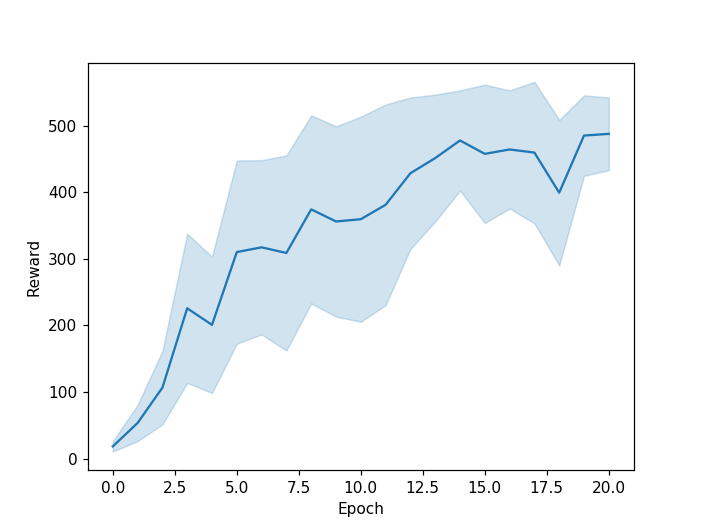

The training was done over a total of 1285 episodes


In [284]:
rewards = agent.training_batch(1000, 256)

### Evaluation

In [289]:
eval_agent(agent, 100, 0.05, 0.2)


Mean success : 472.55 +- 78.70


In [290]:
eval_agent(agent, 100, 0.2, 0.5)


Mean success : 463.74 +- 94.31


In [291]:
eval_agent(agent, 100, 0.2, 1)


Mean success : 424.26 +- 108.26


In [292]:
eval_agent(agent, 100, 0.5, 2)


Mean success : 198.37 +- 200.21


In [293]:
eval_agent(agent, 100, 1, 5)


Mean success : 32.79 +- 57.86


## Both using NAU

### Functions

In [351]:
class NetworkNAURNN(stable_nalu.abstract.ExtendedTorchModule):
    UNIT_NAMES = stable_nalu.layer.GeneralizedCell.UNIT_NAMES

    def __init__(self, unit_name, input_size=5, hidden_size=16, output_size=1, **kwargs):
        super().__init__('network', writer=None, **kwargs)

        self.unit_name = unit_name
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Since for the 'mul' problem, the zero_state should be 1, and for the
        # 'add' problem it should be 0. The zero_states are allowed to be
        # # optimized.
        if unit_name == 'LSTM':
            self.zero_state = torch.nn.ParameterDict({
                'h_t0': torch.nn.Parameter(torch.Tensor(self.hidden_size)),
                'c_t0': torch.nn.Parameter(torch.Tensor(self.hidden_size))
            })
        else:
            self.zero_state = torch.nn.Parameter(torch.Tensor(self.hidden_size))

        self.recurent_cell = stable_nalu.layer.GeneralizedCell(input_size, self.hidden_size,
                                             unit_name,
                                             writer=self.writer,
                                             name='recurrent_layer',
                                             **kwargs)
        self.output_layer = stable_nalu.layer.GeneralizedLayer(self.hidden_size, output_size,
                                            'linear'
                                                if unit_name in {'GRU', 'LSTM', 'RNN-tanh', 'RNN-ReLU'}
                                                else unit_name,
                                             writer=self.writer,
                                             name='output_layer',
                                             **kwargs)
        self.reset_parameters()

    def reset_parameters(self):
        if self.unit_name == 'LSTM':
            for zero_state in self.zero_state.values():
                torch.nn.init.zeros_(zero_state)
        else:
            torch.nn.init.zeros_(self.zero_state)

        self.recurent_cell.reset_parameters()
        self.output_layer.reset_parameters()

    def forward(self, x):
        """Performs recurrent iterations over the input.

        Arguments:
            input: Expected to have the shape [obs, time, dims]
        """
        if len(x.size()) == 2:
            x = x[None]
        # Perform recurrent iterations over the input
        if self.unit_name == 'LSTM':
            h_tm1 = tuple(zero_state.repeat(x.size(0), 1) for zero_state in self.zero_state.values())
        else:
            h_tm1 = self.zero_state.repeat(x.size(0), 1)

        hs = []
        for t in range(x.size(1)):
            x_t = x[:, t]
            h_t = self.recurent_cell(x_t, h_tm1)
            h_tm1 = h_t
            hs.append(h_t)

        # Grap the final hidden output and use as the output from the recurrent layer
#         z_1 = h_t[0] if self.unit_name == 'LSTM' else h_t
        z = [x[0] if self.unit_name == 'LSTM' else x for x in hs]
#         z_2 = self.output_layer(z_1)
        z_2 = self.output_layer(torch.stack(z))
        return z_2

    def extra_repr(self):
        return 'unit_name={}, input_size={}'.format(
            self.unit_name, self.input_size
        )
    
    def predict(self, x):
        return self(x).detach().numpy()

In [402]:
class NetworkNAU(stable_nalu.abstract.ExtendedTorchModule):
    UNIT_NAMES = stable_nalu.layer.GeneralizedLayer.UNIT_NAMES

    def __init__(self, unit_name, input_size=100, hidden_size=2, first_layer=None, nac_mul='none', 
                 output_size=1, eps=1e-7, writer=None, actor=False, **kwargs):
        super().__init__('network', writer=writer, **kwargs)
        self.unit_name = unit_name
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.nac_mul = nac_mul
        self.eps = eps
        self.actor = actor

        if first_layer is not None:
            unit_name_1 = first_layer
        else:
            unit_name_1 = unit_name

        self.layer_1 = stable_nalu.layer.GeneralizedLayer(input_size, hidden_size,
                                        unit_name_1,
                                        writer=self.writer,
                                        name='layer_1',
                                        eps=eps, **kwargs)

        if nac_mul == 'mnac':
            unit_name_2 = unit_name[0:-3] + 'MNAC'
        else:
            unit_name_2 = unit_name

        self.layer_2 = stable_nalu.layer.GeneralizedLayer(hidden_size, 1,
                                        'linear' if unit_name_2 in stable_nalu.layer.BasicLayer.ACTIVATIONS else unit_name_2,
                                        writer=self.writer,
                                        name='layer_2',
                                        eps=eps, **kwargs)
        self.reset_parameters()
        self.z_1_stored = None

    def reset_parameters(self):
        self.layer_1.reset_parameters()
        self.layer_2.reset_parameters()

    def regualizer(self):
        if self.nac_mul == 'max-safe':
            return super().regualizer({
                'z': torch.mean(torch.relu(1 - self.z_1_stored))
            })
        else:
            return super().regualizer()

    def forward(self, input):
        if self.actor:
            if len(input.size()) == 1:
                input = input[None]
        self.writer.add_summary('x', input)
        z_1 = self.layer_1(input)
        self.z_1_stored = z_1
        self.writer.add_summary('z_1', z_1)

        if self.nac_mul == 'none' or self.nac_mul == 'mnac':
            z_2 = self.layer_2(z_1)
        elif self.nac_mul == 'normal':
            z_2 = torch.exp(self.layer_2(torch.log(torch.abs(z_1) + self.eps)))
        elif self.nac_mul == 'safe':
            z_2 = torch.exp(self.layer_2(torch.log(torch.abs(z_1 - 1) + 1)))
        elif self.nac_mul == 'max-safe':
            z_2 = torch.exp(self.layer_2(torch.log(torch.relu(z_1 - 1) + 1)))
        else:
            raise ValueError(f'Unsupported nac_mul option ({self.nac_mul})')

        self.writer.add_summary('z_2', z_2)
        if self.actor:
            z_2 = F.softmax(z_2, dim=-1)
        return z_2

    def extra_repr(self):
        return 'unit_name={}, input_size={}'.format(
            self.unit_name, self.input_size
        )
    
    def predict(self, x):
        return self(x).detach().numpy().flatten()
    
    def select_action(self, x):
        return torch.multinomial(self(x), 1).detach().numpy().flatten()

In [393]:
NetworkNAU.UNIT_NAMES

{'ELU',
 'GradientBanditNAC',
 'GradientBanditNALU',
 'GumbelMNAC',
 'GumbelNAC',
 'GumbelNALU',
 'HardSoftmaxNAC',
 'HardSoftmaxNALU',
 'IndependentNAC',
 'IndependentNALU',
 'LinearNAC',
 'LinearNALU',
 'MNAC',
 'NAC',
 'NALU',
 'PosNAC',
 'PosNALU',
 'ReLU',
 'ReLU6',
 'ReRegualizedLinearMNAC',
 'ReRegualizedLinearNAC',
 'ReRegualizedLinearNALU',
 'ReRegualizedLinearPosNAC',
 'RegualizedLinearMNAC',
 'RegualizedLinearNAC',
 'RegualizedLinearNALU',
 'SELU',
 'Sigmoid',
 'SillyReRegualizedLinearMNAC',
 'SillyReRegualizedLinearNAC',
 'SillyReRegualizedLinearNALU',
 'SoftmaxNAC',
 'SoftmaxNALU',
 'Softsign',
 'Tanh',
 'linear'}

In [378]:
net = NetworkNAU('ReRegualizedLinearMNAC', input_size=5, hidden_size=16, output_size=1)

In [330]:
net = NetworkNAU('ReRegualizedLinearMNAC', input_size=5, hidden_size=16, output_size=2)

In [313]:
net = NetworkNAURNN('ReRegualizedLinearMNAC', input_size=5, hidden_size=16, output_size=1)

### Training

In [353]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


In [407]:
# a_net = NetworkNAU('NALU', input_size=5, hidden_size=128, output_size=agent.env.action_space.n, actor=True)
a_net = ActorNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, agent.env.action_space.n)
v_net = NetworkNAU('ReRegualizedLinearMNAC', input_size=5, hidden_size=64, output_size=1)

In [408]:
agent = A2CAgentRNN(config_a2c, range_train=(0.05, 0.2), range_eval=(0.05, 0.2),
                    a_net=a_net, v_net=v_net, LSTM=False, reg=0.1)

Epoch 0/1000: Mean rewards: 21.72, Std: 12.54
Epoch 50/1000: Mean rewards: 32.28, Std: 16.95
Epoch 100/1000: Mean rewards: 48.88, Std: 28.36
Epoch 150/1000: Mean rewards: 98.26, Std: 49.82
Epoch 200/1000: Mean rewards: 139.62, Std: 71.55
Epoch 250/1000: Mean rewards: 157.44, Std: 81.49
Epoch 300/1000: Mean rewards: 218.34, Std: 83.74
Epoch 350/1000: Mean rewards: 266.08, Std: 106.87
Epoch 400/1000: Mean rewards: 292.92, Std: 117.96
Epoch 450/1000: Mean rewards: 334.5, Std: 116.38
Epoch 500/1000: Mean rewards: 307.24, Std: 106.87
Epoch 550/1000: Mean rewards: 211.1, Std: 57.7
Epoch 600/1000: Mean rewards: 393.04, Std: 131.29
Epoch 650/1000: Mean rewards: 364.88, Std: 121.47
Epoch 700/1000: Mean rewards: 396.48, Std: 134.11
Epoch 750/1000: Mean rewards: 399.28, Std: 105.54
Epoch 800/1000: Mean rewards: 463.12, Std: 74.08
Epoch 850/1000: Mean rewards: 429.66, Std: 113.66
Epoch 900/1000: Mean rewards: 452.72, Std: 90.91
Epoch 950/1000: Mean rewards: 450.7, Std: 89.65
Epoch 999/1000: Mean r

<IPython.core.display.Javascript object>


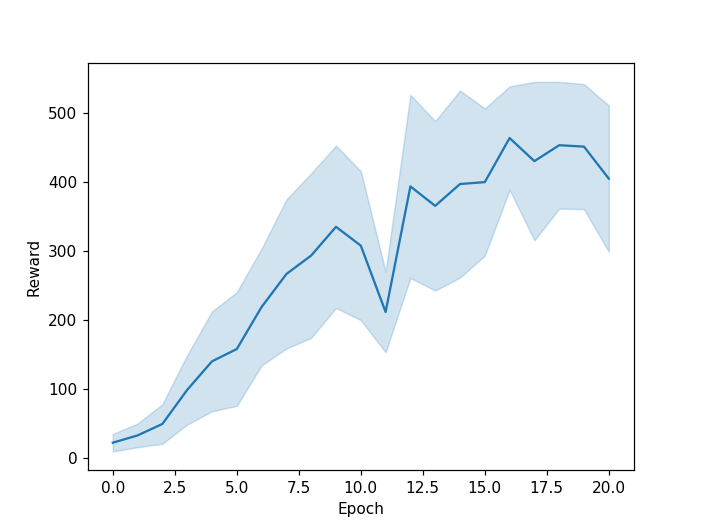

The training was done over a total of 1756 episodes


In [409]:
rewards = agent.training_batch(1000, 256)

### Evaluation

In [412]:
eval_agent(agent, 100, 0.05, 0.2)


Mean success : 432.32 +- 89.42


In [290]:
eval_agent(agent, 100, 0.2, 0.5)


Mean success : 463.74 +- 94.31


In [291]:
eval_agent(agent, 100, 0.2, 1)


Mean success : 424.26 +- 108.26


In [410]:
eval_agent(agent, 100, 0.5, 2)


Mean success : 148.25 +- 176.85


In [411]:
eval_agent(agent, 100, 1, 5)


Mean success : 22.91 +- 43.44


## NAU

In [247]:
layer_name = 'ReRegualizedLinearMNAC'
# layer_name = 'NAC'
class ValueNetworkNAU(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(ValueNetworkNAU, self).__init__()
        self.fc1 = stable_nalu.layer.GeneralizedLayer(input_size, hidden_size, layer_name)
        self.fc2 = stable_nalu.layer.GeneralizedLayer(hidden_size, hidden_size, layer_name)
        self.fc22 = stable_nalu.layer.GeneralizedLayer(hidden_size, hidden_size*2, layer_name)
        self.fc23 = stable_nalu.layer.GeneralizedLayer(hidden_size*2, hidden_size, layer_name)
        self.fc3 = stable_nalu.layer.GeneralizedLayer(hidden_size, output_size, layer_name)
    
        self.fc1.reset_parameters()
        self.fc2.reset_parameters()
        self.fc22.reset_parameters()
        self.fc23.reset_parameters()
        self.fc3.reset_parameters()

    def forward(self, x):
        if len(x.size()) == 1:
            x = x[None]
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc22(out)
        out = self.fc23(out)
        out = self.fc3(out)
        return out
    
    def predict(self, x):
        return self(x).detach().numpy()[0]

In [294]:
v = ValueNetworkNAU(5, 16, 1)
v(torch.rand(10, 5))

tensor([[3.2908e-05],
        [3.2908e-05],
        [3.2908e-05],
        [3.2908e-05],
        [3.2908e-05],
        [3.2908e-05],
        [3.2908e-05],
        [3.2908e-05],
        [3.2908e-05],
        [3.2908e-05]], grad_fn=<ProdBackward1>)

In [239]:
layer_name = 'NAC'
class ActorNetworkNAU(nn.Module):

    def __init__(self, input_size, hidden_size, action_size):
        super(ActorNetworkNAU, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, action_size)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.softmax(self.fc3(out), dim=-1)
        return out
    
    def select_action(self, x):
        return torch.multinomial(self(x), 1).detach().numpy()

In [240]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


In [249]:
agent = A2CAgentRandom(config_a2c, range_train=(0.1, 0.1), range_eval=(0.1, 0.1))

In [250]:
agent.actor_network = ActorNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, agent.env.action_space.n)
agent.value_network = ValueNetworkNAU(agent.env.observation_space.shape[0] + 1, 16, 1)
agent.value_network_optimizer = optim.RMSprop(agent.value_network.parameters(), lr=config_a2c['value_network']['learning_rate'])
agent.actor_network_optimizer = optim.RMSprop(agent.actor_network.parameters(), lr=config_a2c['actor_network']['learning_rate'])

In [251]:
rewards = agent.training_batch(1000, 256)

Epoch 0/1000: Mean rewards: 28.32, Std: 17.21
Epoch 50/1000: Mean rewards: 52.84, Std: 22.66
Epoch 100/1000: Mean rewards: 58.24, Std: 23.01
Epoch 150/1000: Mean rewards: 64.0, Std: 25.52
Epoch 200/1000: Mean rewards: 141.62, Std: 55.89
Epoch 250/1000: Mean rewards: 187.24, Std: 79.88
Epoch 300/1000: Mean rewards: 255.06, Std: 111.05
Epoch 350/1000: Mean rewards: 319.6, Std: 134.14
Epoch 400/1000: Mean rewards: 348.1, Std: 137.57
Epoch 450/1000: Mean rewards: 295.14, Std: 94.32
Epoch 500/1000: Mean rewards: 343.08, Std: 107.66


KeyboardInterrupt: 

# Cleaner

In [3]:
env_id = 'CartPole-v1'
value_learning_rate = 0.001
actor_learning_rate = 0.001
gamma = 0.99
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.001},
 'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.99,
 'seed': 1,
 'value_network': {'learning_rate': 0.001}}


In [4]:
# hidden_size = 32
hidden_size = [32, 32]
# hidden_size = [32, 32, 32]
range_train = (0.05, 0.2)

### Baseline

In [6]:
# agents = []
# name_agents = ['baseline']

In [7]:
a_net = ActorNetwork(5, hidden_size, 2)
v_net = ValueNetwork(5, hidden_size, 1)

In [10]:
agent = A2CAgentRNN(config_a2c, range_train=range_train, range_eval=range_train,
                    a_net=a_net, v_net=v_net, LSTM=False, reg=0.1)
agent.training_batch(1000, 256, disp=False);

In [11]:
agents.append(agent)

## NAU

### Test

In [18]:
NetworkNAU.UNIT_NAMES

{'ELU',
 'GradientBanditNAC',
 'GradientBanditNALU',
 'GumbelMNAC',
 'GumbelNAC',
 'GumbelNALU',
 'HardSoftmaxNAC',
 'HardSoftmaxNALU',
 'IndependentNAC',
 'IndependentNALU',
 'LinearNAC',
 'LinearNALU',
 'MNAC',
 'NAC',
 'NALU',
 'PosNAC',
 'PosNALU',
 'ReLU',
 'ReLU6',
 'ReRegualizedLinearMNAC',
 'ReRegualizedLinearNAC',
 'ReRegualizedLinearNALU',
 'ReRegualizedLinearPosNAC',
 'RegualizedLinearMNAC',
 'RegualizedLinearNAC',
 'RegualizedLinearNALU',
 'SELU',
 'Sigmoid',
 'SillyReRegualizedLinearMNAC',
 'SillyReRegualizedLinearNAC',
 'SillyReRegualizedLinearNALU',
 'SoftmaxNAC',
 'SoftmaxNALU',
 'Softsign',
 'Tanh',
 'linear'}

In [9]:
a_net = NetworkNAU('ReRegualizedLinearNAC', 5, hidden_size=hidden_size, output_size=2, actor=True)
v_net = NetworkNAU('ReRegualizedLinearNAC', 5, hidden_size=hidden_size, output_size=1)
agent = A2CAgentRNN(config_a2c, range_train=range_train, range_eval=range_train,
                    a_net=a_net, v_net=v_net, LSTM=False, reg=1)
agent.training_batch(1000, 256, disp=True)

Epoch 0/1000: Mean rewards: 16.68, Std: 7.74
Epoch 20/1000: Mean rewards: 240.02, Std: 92.64
Epoch 40/1000: Mean rewards: 400.02, Std: 110.0
Epoch 60/1000: Mean rewards: 246.98, Std: 71.69
Epoch 80/1000: Mean rewards: 384.1, Std: 91.48
Epoch 100/1000: Mean rewards: 382.3, Std: 89.16
Epoch 120/1000: Mean rewards: 392.84, Std: 107.1


KeyboardInterrupt: 

In [30]:
agent.evaluate(1, 1, render=True)

Reward: 153.0
masspole : 1.00


153.0

In [24]:
eval_agent(agent, 100, 2, 3, disp=True)


Mean success : 8.51 +- 1.41


array([10., 10.,  7.,  7.,  7.,  9., 10., 10., 11.,  9.,  9.,  8.,  8.,
        8., 10.,  9.,  9.,  8.,  7.,  7.,  8.,  9., 12.,  9.,  7., 10.,
        9.,  6., 10.,  9.,  7., 10.,  9.,  8.,  8.,  8.,  9.,  9.,  7.,
        8.,  7.,  9.,  7.,  9., 14.,  9.,  8.,  9., 12.,  8., 10.,  7.,
        8.,  8.,  9.,  9.,  7.,  7.,  8.,  9.,  8., 11.,  8.,  9.,  9.,
        9.,  9.,  7., 10.,  9.,  9., 10.,  8.,  7.,  9., 11.,  9.,  8.,
        9.,  9.,  8.,  9.,  7.,  7.,  9., 12.,  8.,  7.,  7.,  8.,  7.,
        9.,  8.,  7.,  7.,  8.,  6.,  8.,  6.,  6.])

### Only critic

In [22]:
NetworkNAU.UNIT_NAMES

{'ELU',
 'GradientBanditNAC',
 'GradientBanditNALU',
 'GumbelMNAC',
 'GumbelNAC',
 'GumbelNALU',
 'HardSoftmaxNAC',
 'HardSoftmaxNALU',
 'IndependentNAC',
 'IndependentNALU',
 'LinearNAC',
 'LinearNALU',
 'MNAC',
 'NAC',
 'NALU',
 'PosNAC',
 'PosNALU',
 'ReLU',
 'ReLU6',
 'ReRegualizedLinearMNAC',
 'ReRegualizedLinearNAC',
 'ReRegualizedLinearNALU',
 'ReRegualizedLinearPosNAC',
 'RegualizedLinearMNAC',
 'RegualizedLinearNAC',
 'RegualizedLinearNALU',
 'SELU',
 'Sigmoid',
 'SillyReRegualizedLinearMNAC',
 'SillyReRegualizedLinearNAC',
 'SillyReRegualizedLinearNALU',
 'SoftmaxNAC',
 'SoftmaxNALU',
 'Softsign',
 'Tanh',
 'linear'}

In [65]:
agents = []
name_agents = []

In [66]:
%%time
for unit_name in ['ReLU', 'MNAC', 'NAC', 'NALU', 'ReRegualizedLinearMNAC', 'ReRegualizedLinearNAC']:
    a_net = NetworkNAU('ReLU', input_size=5, hidden_size=hidden_size, output_size=2, actor=True)
    v_net = NetworkNAU(unit_name, input_size=5, hidden_size=hidden_size, output_size=1)
    agent = A2CAgentRNN(config_a2c, range_train=range_train, range_eval=range_train,
                        a_net=a_net, v_net=v_net, LSTM=False, reg=1)
    agent.training_batch(1000, 256, disp=False)
    print(unit_name)
    eval_agent(agent, 100, range_train[0], range_train[1], disp=True)
    agents.append(agent)
    name_agents.append(unit_name)
    print('')

ReLU
Mean success : 482.21 +- 54.73

MNAC
Mean success : 467.69 +- 71.86

NAC
Mean success : 466.85 +- 78.26

NALU
Mean success : 485.93 +- 58.34

ReRegualizedLinearMNAC
Mean success : 470.69 +- 70.93

ReRegualizedLinearNAC
Mean success : 480.50 +- 55.79

Wall time: 50min 16s


#### Evaluation

In [67]:
masses = np.geomspace(0.2, 2, num=21)
min_mass = masses[:-1]
max_mass = masses[1:]
n_eval = 100
print(max_mass)
rewards = np.zeros((len(agents), len(max_mass), n_eval))
pbar = tqdm.notebook.tqdm(total=len(max_mass) * len(agents))
for j, m in enumerate(max_mass):
    for i, a in enumerate(agents):
        rws = eval_agent(a, n_eval, min_mass[i], m)
        rewards[i, j] = rws
        pbar.update(1)
pbar.close()

[0.22440369 0.25178508 0.28250751 0.31697864 0.35565588 0.39905246
 0.44774423 0.50237729 0.56367659 0.63245553 0.70962678 0.79621434
 0.89336718 1.00237447 1.12468265 1.26191469 1.41589157 1.58865647
 1.78250188 2.        ]


In [70]:
np.save('../figures/rewards_only_critic', rewards)

In [30]:
name_agents = ['ReLU', 'MNAC', 'NAC', 'NALU', 'ReRegualizedLinearMNAC', 'ReRegualizedLinearNAC']

In [71]:
rewards.shape

(6, 20, 100)

In [73]:
df = []
for i, agent in enumerate(name_agents):
    for j, mass in enumerate(max_mass):
        for k, it in enumerate(list(range(n_eval))):
            df.append([agent, mass, it, rewards[i, j, k]])
df = pd.DataFrame(df, columns=['model', 'mass', 'iter', 'value'])

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))ax =
ax.set_xscale('log')
sns.lineplot(data=df, x='mass', y='value', hue='model', ax=ax)


SyntaxError: invalid syntax (<ipython-input-82-24b2af2ac392>, line 1)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

<IPython.core.display.Javascript object>


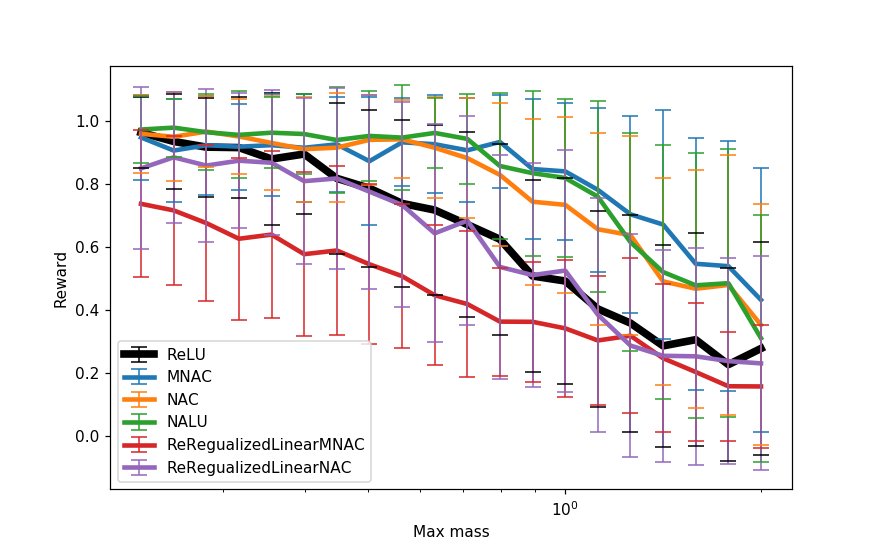

In [69]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(6):
    if i == 0:
        ax.errorbar(max_mass, rewards[i].mean(axis=1)/500, yerr=rewards[i].std(axis=1)/500,
                     barsabove=True, capsize=5, label=name_agents[i], color='black', linewidth=5, elinewidth=1)
    else:
        ax.errorbar(max_mass, rewards[i].mean(axis=1)/500, yerr=rewards[i].std(axis=1)/500,
                     barsabove=True, capsize=5, label=name_agents[i], linewidth=3, elinewidth=1)
ax = fig.axes[0]
ax.legend()
# ax.set_xlim(0.05, max_mass[-1])
ax.set_xscale('log')
# ax.set_ylim(0, 1)
# ax.set_yscale('log')
ax.set_ylabel('Reward')
ax.set_xlabel('Max mass')
plt.savefig('../figures/layer_type_value.pdf', format='pdf')

### Only actor

In [12]:
# NetworkNAU.UNIT_NAMES

In [38]:
name_agents = ['ReLU', 'MNAC', 'NAC', 'NALU', 'ReRegualizedLinearMNAC', 'ReRegualizedLinearNAC']
agents = []

Epoch 0/1000: Mean rewards: 18.92, Std: 9.29
Epoch 20/1000: Mean rewards: 87.24, Std: 55.77
Epoch 40/1000: Mean rewards: 161.0, Std: 83.02
Epoch 60/1000: Mean rewards: 172.82, Std: 81.56
Epoch 80/1000: Mean rewards: 183.1, Std: 74.9
Epoch 100/1000: Mean rewards: 215.56, Std: 80.58
Epoch 120/1000: Mean rewards: 198.52, Std: 69.41
Epoch 140/1000: Mean rewards: 187.22, Std: 57.02
Epoch 160/1000: Mean rewards: 276.26, Std: 118.77
Epoch 180/1000: Mean rewards: 196.32, Std: 67.63
Epoch 200/1000: Mean rewards: 275.98, Std: 110.45
Epoch 220/1000: Mean rewards: 368.88, Std: 93.18
Epoch 240/1000: Mean rewards: 369.08, Std: 122.55
Epoch 260/1000: Mean rewards: 324.88, Std: 114.65
Epoch 280/1000: Mean rewards: 363.94, Std: 133.57
Epoch 300/1000: Mean rewards: 252.56, Std: 69.19
Epoch 320/1000: Mean rewards: 284.32, Std: 86.04
Epoch 340/1000: Mean rewards: 415.28, Std: 107.17
Epoch 360/1000: Mean rewards: 397.22, Std: 100.7
Epoch 380/1000: Mean rewards: 380.72, Std: 111.53
Epoch 400/1000: Mean rewa

<IPython.core.display.Javascript object>


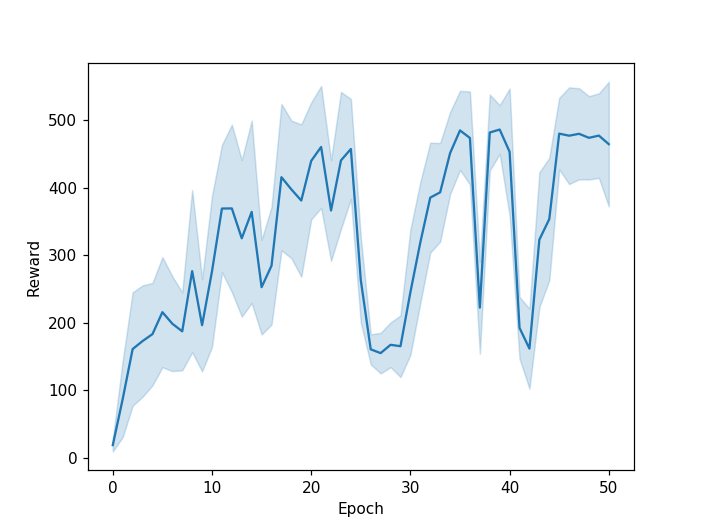

The training was done over a total of 1011 episodes
ReLU
Mean success : 467.58 +- 82.27

Epoch 0/1000: Mean rewards: 21.9, Std: 12.03
Epoch 20/1000: Mean rewards: 23.02, Std: 13.3
Epoch 40/1000: Mean rewards: 23.34, Std: 15.41
Epoch 60/1000: Mean rewards: 20.06, Std: 10.85
Epoch 80/1000: Mean rewards: 21.22, Std: 10.03
Epoch 100/1000: Mean rewards: 23.32, Std: 12.02
Epoch 120/1000: Mean rewards: 24.82, Std: 14.78
Epoch 140/1000: Mean rewards: 22.8, Std: 12.09
Epoch 160/1000: Mean rewards: 22.0, Std: 12.18
Epoch 180/1000: Mean rewards: 23.82, Std: 12.26
Epoch 200/1000: Mean rewards: 25.38, Std: 11.72
Epoch 220/1000: Mean rewards: 23.02, Std: 14.15
Epoch 240/1000: Mean rewards: 25.28, Std: 14.77
Epoch 260/1000: Mean rewards: 19.28, Std: 7.99
Epoch 280/1000: Mean rewards: 24.66, Std: 15.29
Epoch 300/1000: Mean rewards: 21.5, Std: 12.54
Epoch 320/1000: Mean rewards: 23.22, Std: 11.89
Epoch 340/1000: Mean rewards: 19.86, Std: 9.62
Epoch 360/1000: Mean rewards: 24.14, Std: 15.57
Epoch 380/10

<IPython.core.display.Javascript object>


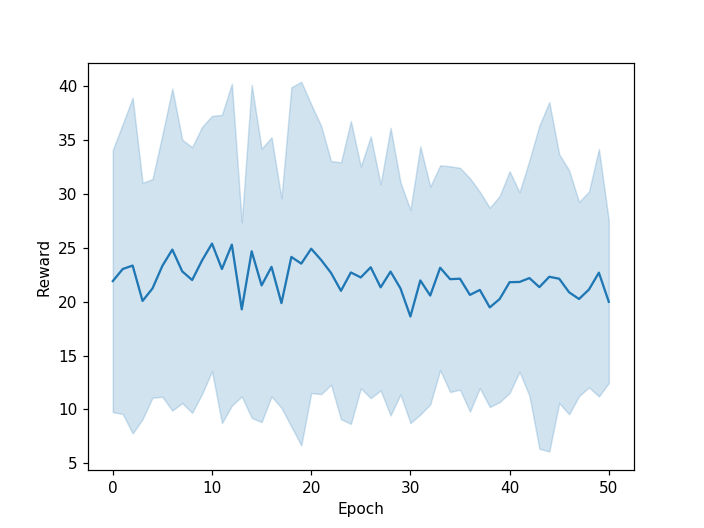

The training was done over a total of 11717 episodes
MNAC
Mean success : 21.26 +- 10.10

Epoch 0/1000: Mean rewards: 30.6, Std: 19.92
Epoch 20/1000: Mean rewards: 100.26, Std: 42.58
Epoch 40/1000: Mean rewards: 109.16, Std: 31.68
Epoch 60/1000: Mean rewards: 123.1, Std: 58.89
Epoch 80/1000: Mean rewards: 270.76, Std: 109.87
Epoch 100/1000: Mean rewards: 279.08, Std: 117.98
Epoch 120/1000: Mean rewards: 305.86, Std: 127.71
Epoch 140/1000: Mean rewards: 343.82, Std: 139.05
Epoch 160/1000: Mean rewards: 360.64, Std: 116.87
Epoch 180/1000: Mean rewards: 344.36, Std: 133.64
Epoch 200/1000: Mean rewards: 397.56, Std: 115.29
Epoch 220/1000: Mean rewards: 428.44, Std: 110.61
Epoch 240/1000: Mean rewards: 410.64, Std: 115.74
Epoch 260/1000: Mean rewards: 434.96, Std: 104.59
Epoch 280/1000: Mean rewards: 444.5, Std: 103.0
Epoch 300/1000: Mean rewards: 407.48, Std: 95.33
Epoch 320/1000: Mean rewards: 436.78, Std: 102.41
Epoch 340/1000: Mean rewards: 443.76, Std: 98.53
Epoch 360/1000: Mean rewards

<IPython.core.display.Javascript object>


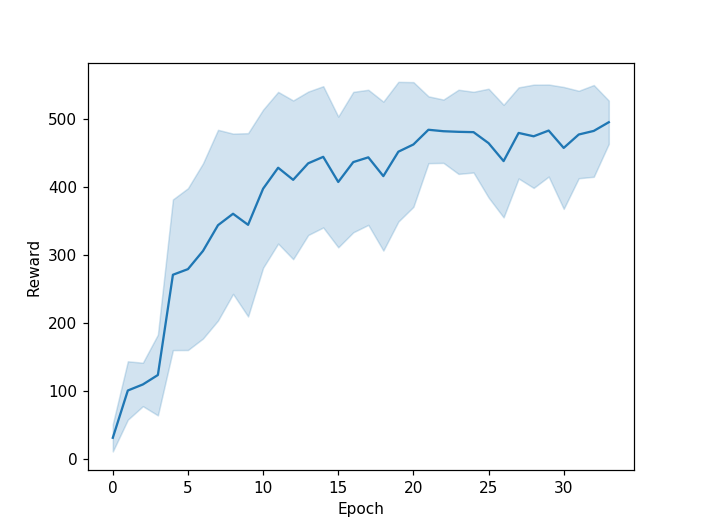

The training was done over a total of 542 episodes
NAC
Mean success : 496.91 +- 15.75

Epoch 0/1000: Mean rewards: 9.88, Std: 1.07
Epoch 20/1000: Mean rewards: 37.28, Std: 14.05
Epoch 40/1000: Mean rewards: 43.78, Std: 13.3
Epoch 60/1000: Mean rewards: 46.96, Std: 15.96
Epoch 80/1000: Mean rewards: 47.38, Std: 15.86
Epoch 100/1000: Mean rewards: 56.88, Std: 24.33
Epoch 120/1000: Mean rewards: 67.16, Std: 31.46
Epoch 140/1000: Mean rewards: 44.86, Std: 12.74
Epoch 160/1000: Mean rewards: 31.28, Std: 9.85
Epoch 180/1000: Mean rewards: 68.04, Std: 34.11
Epoch 200/1000: Mean rewards: 54.0, Std: 35.0
Epoch 220/1000: Mean rewards: 30.4, Std: 23.61
Epoch 240/1000: Mean rewards: 109.94, Std: 45.64
Epoch 260/1000: Mean rewards: 116.46, Std: 43.01
Epoch 280/1000: Mean rewards: 75.84, Std: 19.29
Epoch 300/1000: Mean rewards: 86.8, Std: 62.39
Epoch 320/1000: Mean rewards: 59.48, Std: 15.32
Epoch 340/1000: Mean rewards: 188.44, Std: 84.78
Epoch 360/1000: Mean rewards: 74.58, Std: 19.62
Epoch 380/10

<IPython.core.display.Javascript object>


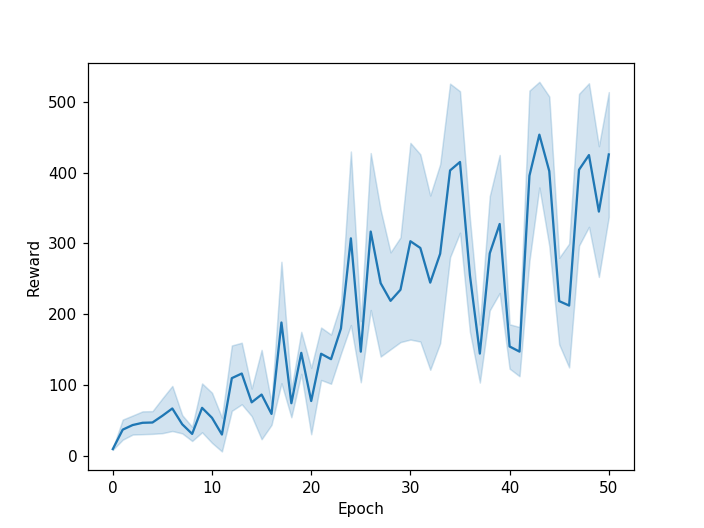

The training was done over a total of 2410 episodes
NALU
Mean success : 420.16 +- 87.75

Epoch 0/1000: Mean rewards: 22.56, Std: 12.87
Epoch 20/1000: Mean rewards: 22.86, Std: 11.29
Epoch 40/1000: Mean rewards: 22.06, Std: 10.66
Epoch 60/1000: Mean rewards: 24.48, Std: 13.8
Epoch 80/1000: Mean rewards: 22.72, Std: 11.07
Epoch 100/1000: Mean rewards: 21.62, Std: 9.74
Epoch 120/1000: Mean rewards: 20.9, Std: 13.6
Epoch 140/1000: Mean rewards: 21.9, Std: 11.26
Epoch 160/1000: Mean rewards: 22.48, Std: 11.93
Epoch 180/1000: Mean rewards: 25.36, Std: 13.55
Epoch 200/1000: Mean rewards: 28.88, Std: 16.81
Epoch 220/1000: Mean rewards: 35.58, Std: 27.75
Epoch 240/1000: Mean rewards: 34.64, Std: 22.56
Epoch 260/1000: Mean rewards: 40.88, Std: 27.31
Epoch 280/1000: Mean rewards: 35.48, Std: 19.06
Epoch 300/1000: Mean rewards: 51.48, Std: 40.04
Epoch 320/1000: Mean rewards: 44.98, Std: 23.46
Epoch 340/1000: Mean rewards: 54.72, Std: 38.72
Epoch 360/1000: Mean rewards: 58.08, Std: 30.42
Epoch 380/

<IPython.core.display.Javascript object>


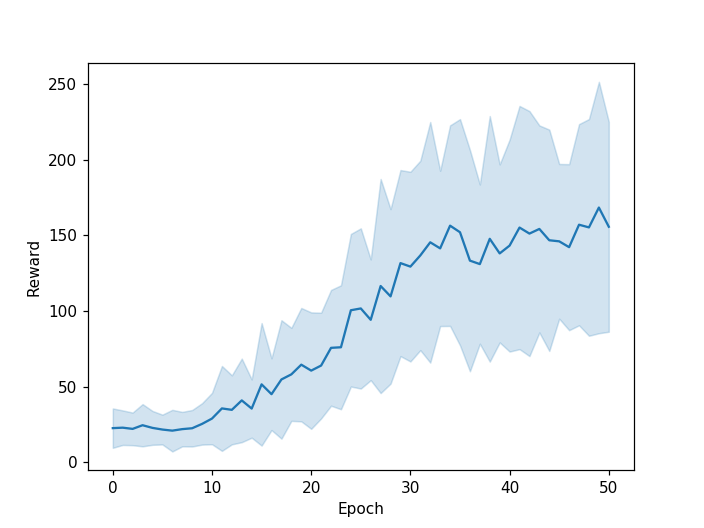

The training was done over a total of 4716 episodes
ReRegualizedLinearMNAC
Mean success : 159.98 +- 67.48

Epoch 0/1000: Mean rewards: 18.82, Std: 6.98
Epoch 20/1000: Mean rewards: 72.62, Std: 35.2
Epoch 40/1000: Mean rewards: 202.4, Std: 107.39
Epoch 60/1000: Mean rewards: 249.64, Std: 120.35
Epoch 80/1000: Mean rewards: 331.68, Std: 138.35
Epoch 100/1000: Mean rewards: 367.98, Std: 100.66
Epoch 120/1000: Mean rewards: 434.76, Std: 95.4
Epoch 140/1000: Mean rewards: 425.54, Std: 131.75
Epoch 160/1000: Mean rewards: 421.28, Std: 132.04
Epoch 180/1000: Mean rewards: 415.82, Std: 131.72
Epoch 200/1000: Mean rewards: 476.4, Std: 69.07
Epoch 220/1000: Mean rewards: 454.92, Std: 100.33
Epoch 240/1000: Mean rewards: 412.28, Std: 128.73
Epoch 260/1000: Mean rewards: 490.86, Std: 39.24
Early stopping !


<IPython.core.display.Javascript object>


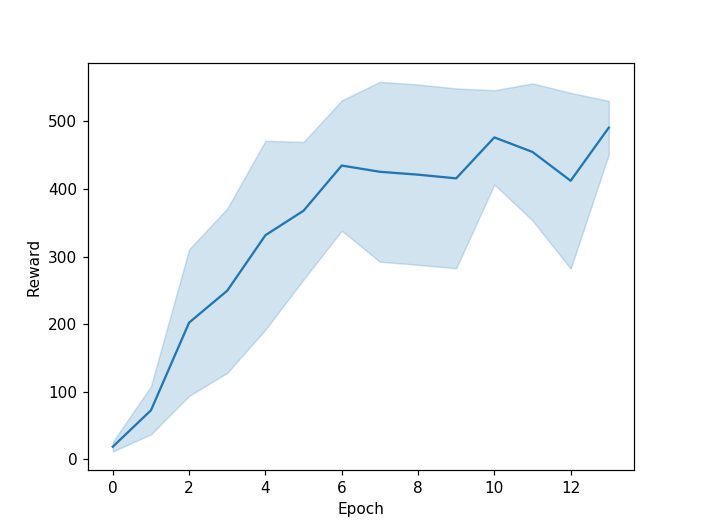

The training was done over a total of 285 episodes
ReRegualizedLinearNAC
Mean success : 488.33 +- 53.03

Wall time: 50min 56s


In [40]:
%%time
for unit_name in name_agents:
    a_net = NetworkNAU(unit_name, input_size=5, hidden_size=hidden_size, output_size=2, actor=True)
    v_net = NetworkNAU('ReLU', input_size=5, hidden_size=hidden_size, output_size=1)
    agent = A2CAgentRNN(config_a2c, range_train=range_train, range_eval=range_train,
                        a_net=a_net, v_net=v_net, LSTM=False, reg=1)
    agent.training_batch(1000, 256, disp=True)
    print(unit_name)
    eval_agent(agent, 100, range_train[0], range_train[1], disp=True)
    agents.append(agent)
    print('')

#### Evaluation

In [41]:
masses = np.geomspace(0.2, 2, num=21)
min_mass = masses[:-1]
max_mass = masses[1:]
n_eval = 100
print(max_mass)
rewards = np.zeros((len(agents), len(max_mass), n_eval))
pbar = tqdm.notebook.tqdm(total=len(max_mass) * len(agents))
for j, m in enumerate(max_mass):
    for i, a in enumerate(agents):
        try:
            rws = eval_agent(a, n_eval, min_mass[i], max_mass[i])
            rewards[i, j] = rws
            pbar.update(1)
        except:
            print(f'Mass : {m:.2f}, agent : {name_agents[i]}')
pbar.close()

[0.22440369 0.25178508 0.28250751 0.31697864 0.35565588 0.39905246
 0.44774423 0.50237729 0.56367659 0.63245553 0.70962678 0.79621434
 0.89336718 1.00237447 1.12468265 1.26191469 1.41589157 1.58865647
 1.78250188 2.        ]


In [42]:
np.save('../figures/rewards_only_actor', rewards)

In [62]:
rewards = np.load('../figures/rewards_only_actor.npy')

In [63]:
rewards.shape

(6, 20, 100)

<IPython.core.display.Javascript object>


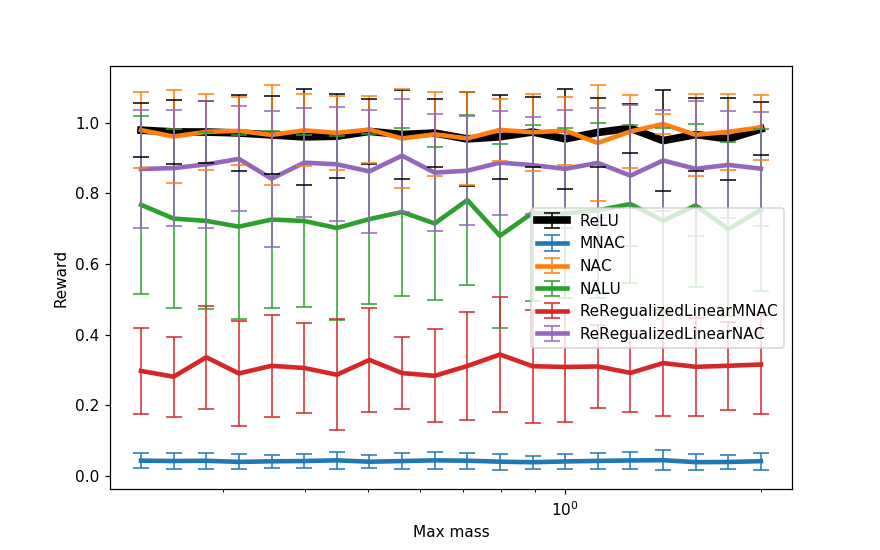

In [64]:
fig = plt.figure(figsize=(8, 5))
for i in range(rewards.shape[0]):
    if i == 0:
        plt.errorbar(max_mass, rewards[i].mean(axis=1)/500, yerr=rewards[i].std(axis=1)/500,
                     barsabove=True, capsize=5, label=name_agents[i], color='black', linewidth=5, elinewidth=1)
    else:
        plt.errorbar(max_mass, rewards[i].mean(axis=1)/500, yerr=rewards[i].std(axis=1)/500,
                     barsabove=True, capsize=5, label=name_agents[i], linewidth=3, elinewidth=1)
ax = fig.axes[0]
ax.legend()
# ax.set_xlim(0.05, max_mass[-1])
ax.set_xscale('log')
# ax.set_ylim(0, 1)
# ax.set_yscale('log')
ax.set_ylabel('Reward')
ax.set_xlabel('Max mass')
plt.savefig('../figures/layer_type_agents.pdf', format='pdf')

### Both critic and actor

In [53]:
agents_both = []
name_agents = ['ReLU', 'MNAC', 'NAC', 'NALU', 'ReRegualizedLinearMNAC', 'ReRegualizedLinearNAC']

Epoch 0/1000: Mean rewards: 30.3, Std: 16.05
Epoch 20/1000: Mean rewards: 106.84, Std: 55.83
Epoch 40/1000: Mean rewards: 148.88, Std: 59.48
Epoch 60/1000: Mean rewards: 181.78, Std: 88.78
Epoch 80/1000: Mean rewards: 175.12, Std: 81.45
Epoch 100/1000: Mean rewards: 204.04, Std: 97.66
Epoch 120/1000: Mean rewards: 207.98, Std: 85.64
Epoch 140/1000: Mean rewards: 214.52, Std: 71.12
Epoch 160/1000: Mean rewards: 210.58, Std: 81.81
Epoch 180/1000: Mean rewards: 233.6, Std: 84.3
Epoch 200/1000: Mean rewards: 324.54, Std: 112.73
Epoch 220/1000: Mean rewards: 334.16, Std: 109.85
Epoch 240/1000: Mean rewards: 357.62, Std: 113.67
Epoch 260/1000: Mean rewards: 373.88, Std: 119.84
Epoch 280/1000: Mean rewards: 366.84, Std: 122.82
Epoch 300/1000: Mean rewards: 366.04, Std: 109.34
Epoch 320/1000: Mean rewards: 260.74, Std: 110.96
Epoch 340/1000: Mean rewards: 279.9, Std: 111.96
Epoch 360/1000: Mean rewards: 252.74, Std: 115.93
Epoch 380/1000: Mean rewards: 270.84, Std: 120.55
Epoch 400/1000: Mean 

<IPython.core.display.Javascript object>


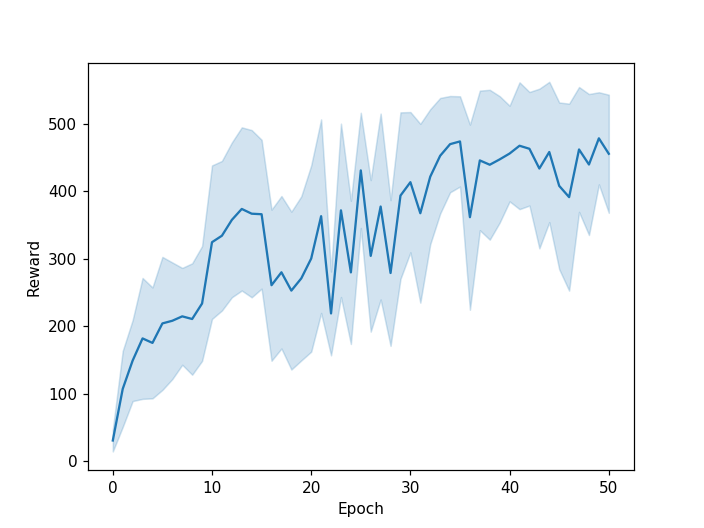

The training was done over a total of 855 episodes
ReLU
Mean success : 448.04 +- 98.10

Epoch 0/1000: Mean rewards: 21.9, Std: 12.03
Epoch 20/1000: Mean rewards: 23.02, Std: 13.3
Epoch 40/1000: Mean rewards: 22.68, Std: 11.65
Epoch 60/1000: Mean rewards: 19.92, Std: 10.32
Epoch 80/1000: Mean rewards: 24.1, Std: 11.23
Epoch 100/1000: Mean rewards: 20.1, Std: 9.85
Epoch 120/1000: Mean rewards: 21.02, Std: 9.98
Epoch 140/1000: Mean rewards: 23.04, Std: 11.71
Epoch 160/1000: Mean rewards: 24.02, Std: 14.84
Epoch 180/1000: Mean rewards: 23.14, Std: 13.62
Epoch 200/1000: Mean rewards: 20.64, Std: 9.03
Epoch 220/1000: Mean rewards: 25.84, Std: 16.94
Epoch 240/1000: Mean rewards: 19.5, Std: 9.28
Epoch 260/1000: Mean rewards: 19.78, Std: 13.78
Epoch 280/1000: Mean rewards: 22.6, Std: 10.75
Epoch 300/1000: Mean rewards: 22.78, Std: 11.62
Epoch 320/1000: Mean rewards: 23.02, Std: 12.68
Epoch 340/1000: Mean rewards: 19.68, Std: 8.0
Epoch 360/1000: Mean rewards: 20.34, Std: 10.99
Epoch 380/1000: Me

<IPython.core.display.Javascript object>


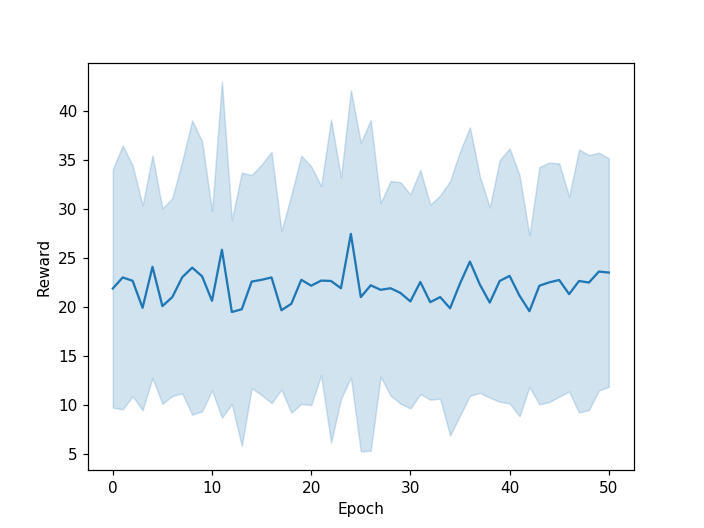

The training was done over a total of 11652 episodes
MNAC
Mean success : 20.76 +- 10.38

Epoch 0/1000: Mean rewards: 23.12, Std: 10.95
Epoch 20/1000: Mean rewards: 136.84, Std: 63.25
Epoch 40/1000: Mean rewards: 190.46, Std: 84.76
Epoch 60/1000: Mean rewards: 224.94, Std: 89.67
Epoch 80/1000: Mean rewards: 247.76, Std: 86.03
Epoch 100/1000: Mean rewards: 253.5, Std: 87.01
Epoch 120/1000: Mean rewards: 341.8, Std: 127.74
Epoch 140/1000: Mean rewards: 262.82, Std: 126.22
Epoch 160/1000: Mean rewards: 256.78, Std: 91.05
Epoch 180/1000: Mean rewards: 344.66, Std: 137.05
Epoch 200/1000: Mean rewards: 371.38, Std: 131.05
Epoch 220/1000: Mean rewards: 377.92, Std: 130.11
Epoch 240/1000: Mean rewards: 361.9, Std: 127.46
Epoch 260/1000: Mean rewards: 355.64, Std: 109.48
Epoch 280/1000: Mean rewards: 361.0, Std: 130.4
Epoch 300/1000: Mean rewards: 359.12, Std: 121.86
Epoch 320/1000: Mean rewards: 404.1, Std: 119.32
Epoch 340/1000: Mean rewards: 422.5, Std: 106.75
Epoch 360/1000: Mean rewards: 40

<IPython.core.display.Javascript object>


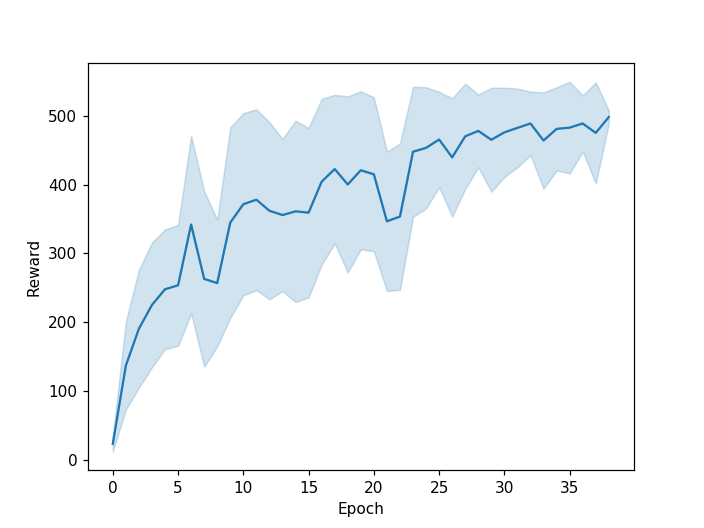

The training was done over a total of 612 episodes
NAC
Mean success : 482.51 +- 56.25

Epoch 0/1000: Mean rewards: 9.38, Std: 0.75
Epoch 20/1000: Mean rewards: 9.4, Std: 0.8
Epoch 40/1000: Mean rewards: 9.2, Std: 0.8
Epoch 60/1000: Mean rewards: 9.3, Std: 0.81
Epoch 80/1000: Mean rewards: 9.16, Std: 0.76
Epoch 100/1000: Mean rewards: 9.42, Std: 0.67
Epoch 120/1000: Mean rewards: 9.12, Std: 0.68
Epoch 140/1000: Mean rewards: 9.16, Std: 0.73
Epoch 160/1000: Mean rewards: 9.36, Std: 0.79
Epoch 180/1000: Mean rewards: 9.4, Std: 0.69
Epoch 200/1000: Mean rewards: 9.26, Std: 0.72
Epoch 220/1000: Mean rewards: 9.16, Std: 0.7
Epoch 240/1000: Mean rewards: 9.4, Std: 0.8
Epoch 260/1000: Mean rewards: 9.34, Std: 0.76
Epoch 280/1000: Mean rewards: 9.44, Std: 0.8
Epoch 300/1000: Mean rewards: 9.32, Std: 0.73
Epoch 320/1000: Mean rewards: 9.22, Std: 0.67
Epoch 340/1000: Mean rewards: 9.26, Std: 0.69
Epoch 360/1000: Mean rewards: 9.16, Std: 0.81
Epoch 380/1000: Mean rewards: 9.34, Std: 0.82
Epoch 400

<IPython.core.display.Javascript object>


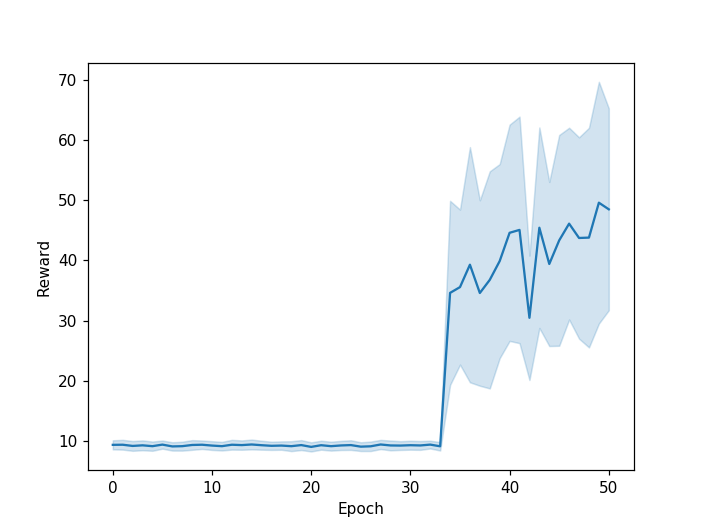

The training was done over a total of 20410 episodes
NALU
Mean success : 48.20 +- 15.55

Epoch 0/1000: Mean rewards: 21.9, Std: 12.03
Epoch 20/1000: Mean rewards: 23.02, Std: 13.3
Epoch 40/1000: Mean rewards: 22.68, Std: 11.65
Epoch 60/1000: Mean rewards: 19.92, Std: 10.32
Epoch 80/1000: Mean rewards: 24.1, Std: 11.23
Epoch 100/1000: Mean rewards: 19.88, Std: 9.83
Epoch 120/1000: Mean rewards: 21.98, Std: 10.73
Epoch 140/1000: Mean rewards: 26.74, Std: 14.77
Epoch 160/1000: Mean rewards: 30.48, Std: 19.58
Epoch 180/1000: Mean rewards: 30.34, Std: 18.16
Epoch 200/1000: Mean rewards: 31.62, Std: 16.86
Epoch 220/1000: Mean rewards: 40.28, Std: 28.86
Epoch 240/1000: Mean rewards: 41.5, Std: 28.5
Epoch 260/1000: Mean rewards: 34.62, Std: 24.33
Epoch 280/1000: Mean rewards: 47.78, Std: 33.29
Epoch 300/1000: Mean rewards: 50.6, Std: 34.48
Epoch 320/1000: Mean rewards: 52.88, Std: 31.74
Epoch 340/1000: Mean rewards: 62.56, Std: 40.96
Epoch 360/1000: Mean rewards: 57.38, Std: 31.68
Epoch 380/10

<IPython.core.display.Javascript object>


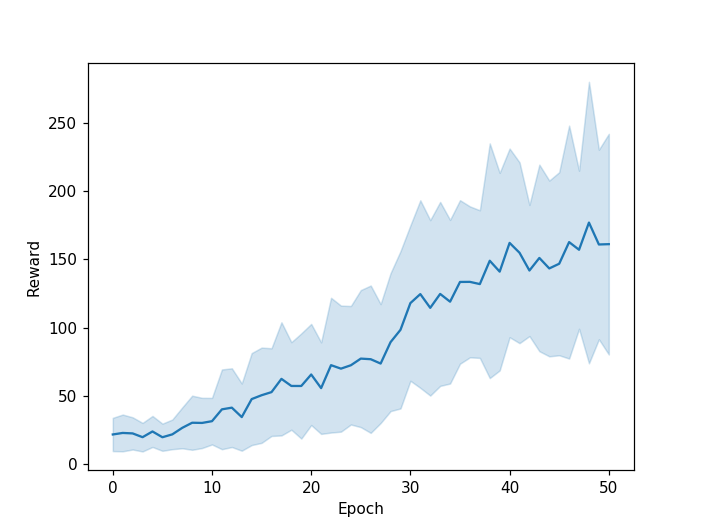

The training was done over a total of 4615 episodes
ReRegualizedLinearMNAC
Mean success : 160.02 +- 80.38

Epoch 0/1000: Mean rewards: 25.58, Std: 14.82
Epoch 20/1000: Mean rewards: 133.54, Std: 52.57
Epoch 40/1000: Mean rewards: 117.0, Std: 58.89
Epoch 60/1000: Mean rewards: 203.92, Std: 109.97
Epoch 80/1000: Mean rewards: 309.82, Std: 113.39
Epoch 100/1000: Mean rewards: 329.54, Std: 141.4
Epoch 120/1000: Mean rewards: 323.86, Std: 123.11
Epoch 140/1000: Mean rewards: 351.72, Std: 145.66
Epoch 160/1000: Mean rewards: 372.08, Std: 135.32
Epoch 180/1000: Mean rewards: 334.1, Std: 141.03
Epoch 200/1000: Mean rewards: 351.16, Std: 121.62
Epoch 220/1000: Mean rewards: 423.34, Std: 113.93
Epoch 240/1000: Mean rewards: 402.0, Std: 103.53
Epoch 260/1000: Mean rewards: 481.44, Std: 53.82
Epoch 280/1000: Mean rewards: 472.22, Std: 71.09
Epoch 300/1000: Mean rewards: 444.18, Std: 78.1
Epoch 320/1000: Mean rewards: 494.46, Std: 27.18
Early stopping !


<IPython.core.display.Javascript object>


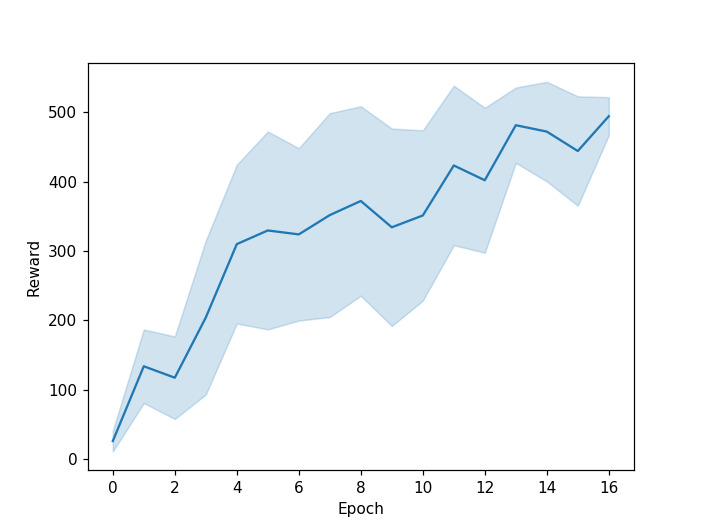

The training was done over a total of 371 episodes
ReRegualizedLinearNAC
Mean success : 484.94 +- 59.92

Wall time: 44min 32s


In [55]:
%%time
for unit_name in name_agents:
    a_net = NetworkNAU(unit_name, input_size=5, hidden_size=hidden_size, output_size=2, actor=True)
    v_net = NetworkNAU(unit_name, input_size=5, hidden_size=hidden_size, output_size=1)
    agent = A2CAgentRNN(config_a2c, range_train=range_train, range_eval=range_train,
                        a_net=a_net, v_net=v_net, LSTM=False, reg=1)
    agent.training_batch(1000, 256, disp=True)
    print(unit_name)
    eval_agent(agent, 100, range_train[0], range_train[1], disp=True)
    agents_both.append(agent)
    print('')

#### Evaluation

In [56]:
masses = np.geomspace(0.2, 2, num=21)
min_mass = masses[:-1]
max_mass = masses[1:]
n_eval = 100
print(max_mass)
rewards = np.zeros((len(agents_both), len(max_mass), n_eval))
pbar = tqdm.notebook.tqdm(total=len(max_mass) * len(agents_both))
for j, m in enumerate(max_mass):
    for i, a in enumerate(agents_both):
        try:
            rws = eval_agent(a, n_eval, min_mass[i], m)
            rewards[i, j] = rws
        except:
            print(f'Exception model {name_agents[i]} mass {m:.2f}')
            pass
        pbar.update(1)
pbar.close()

[0.22440369 0.25178508 0.28250751 0.31697864 0.35565588 0.39905246
 0.44774423 0.50237729 0.56367659 0.63245553 0.70962678 0.79621434
 0.89336718 1.00237447 1.12468265 1.26191469 1.41589157 1.58865647
 1.78250188 2.        ]


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x0000028FA3F0AD48>
Traceback (most recent call last):
  File "C:\tools\Anaconda3\lib\site-packages\tqdm\notebook.py", line 227, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


Exception model MNAC mass 1.59


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x0000028FA3F0AD48>
Traceback (most recent call last):
  File "C:\tools\Anaconda3\lib\site-packages\tqdm\notebook.py", line 227, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


Exception model ReRegualizedLinearMNAC mass 1.59


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x0000028FA3F0AD48>
Traceback (most recent call last):
  File "C:\tools\Anaconda3\lib\site-packages\tqdm\notebook.py", line 227, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


Exception model ReRegualizedLinearMNAC mass 1.78


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x0000028FA3F0AD48>
Traceback (most recent call last):
  File "C:\tools\Anaconda3\lib\site-packages\tqdm\notebook.py", line 227, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


Exception model MNAC mass 2.00


Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x0000028FA3F0AD48>
Traceback (most recent call last):
  File "C:\tools\Anaconda3\lib\site-packages\tqdm\notebook.py", line 227, in __iter__
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


Exception model ReRegualizedLinearMNAC mass 2.00



In [58]:
np.save('../figures/rewards_both', rewards)

<IPython.core.display.Javascript object>


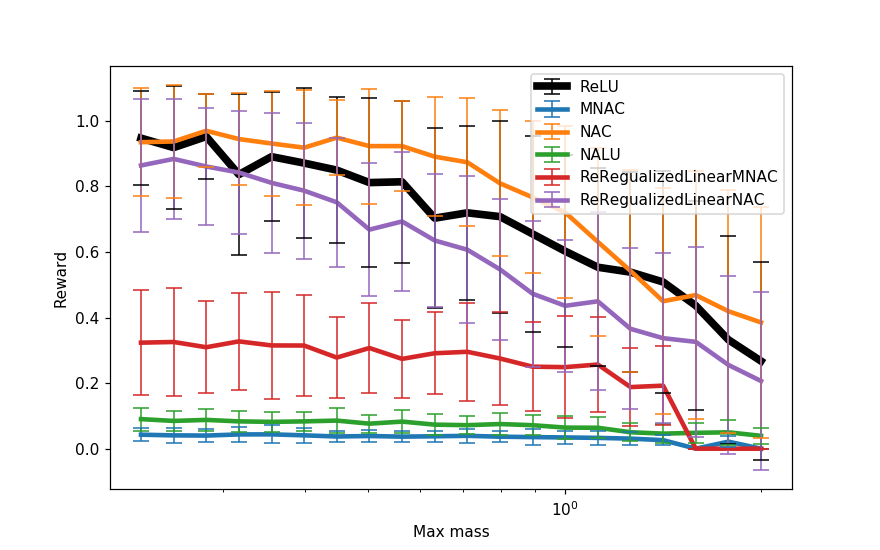

In [61]:
fig = plt.figure(figsize=(8, 5))
for i, a in enumerate(agents):
    if i == 0:
        plt.errorbar(max_mass, rewards[i].mean(axis=1)/500, yerr=rewards[i].std(axis=1)/500,
                     barsabove=True, capsize=5, label=name_agents[i], color='black', linewidth=5, elinewidth=1)
    else:
        plt.errorbar(max_mass, rewards[i].mean(axis=1)/500, yerr=rewards[i].std(axis=1)/500,
                     barsabove=True, capsize=5, label=name_agents[i], linewidth=3, elinewidth=1)
ax = fig.axes[0]
ax.legend()
# ax.set_xlim(0.05, max_mass[-1])
ax.set_xscale('log')
# ax.set_ylim(0, 1)
# ax.set_yscale('log')
ax.set_ylabel('Reward')
ax.set_xlabel('Max mass')
plt.savefig('../figures/layer_type_both.pdf', format='pdf')

# MountainCar

In [77]:
env_id = 'MountainCar-v0'
value_learning_rate = 0.1
actor_learning_rate = 0.1
gamma = 0.9
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'value_network': {'learning_rate': value_learning_rate},
    'actor_network': {'learning_rate': actor_learning_rate},
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'actor_network': {'learning_rate': 0.1},
 'entropy': 1,
 'env_id': 'MountainCar-v0',
 'gamma': 0.9,
 'seed': 1,
 'value_network': {'learning_rate': 0.1}}


In [74]:
env = gym.make(env_id)
# We wrap it in order to save our experiment on a file.
env = Monitor(env, "./gym-results", force=True)
env.reset()
done = False
obs = env.reset()
while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
env.close()
show_video("./gym-results")

In [78]:
agent = A2CAgent(config_a2c)
rewards = agent.training_batch(1000, 256)

Epoch 0/1000: Mean rewards: -200.0, Std: 0.0
Epoch 50/1000: Mean rewards: -200.0, Std: 0.0
Epoch 100/1000: Mean rewards: -200.0, Std: 0.0
Epoch 150/1000: Mean rewards: -200.0, Std: 0.0
Epoch 200/1000: Mean rewards: -200.0, Std: 0.0
Epoch 250/1000: Mean rewards: -200.0, Std: 0.0
Epoch 300/1000: Mean rewards: -200.0, Std: 0.0
Epoch 350/1000: Mean rewards: -200.0, Std: 0.0
Epoch 400/1000: Mean rewards: -200.0, Std: 0.0
Epoch 450/1000: Mean rewards: -200.0, Std: 0.0
Epoch 500/1000: Mean rewards: -200.0, Std: 0.0
Epoch 550/1000: Mean rewards: -200.0, Std: 0.0
Epoch 600/1000: Mean rewards: -200.0, Std: 0.0
Epoch 650/1000: Mean rewards: -200.0, Std: 0.0
Epoch 700/1000: Mean rewards: -200.0, Std: 0.0
Epoch 750/1000: Mean rewards: -200.0, Std: 0.0
Epoch 800/1000: Mean rewards: -200.0, Std: 0.0
Epoch 850/1000: Mean rewards: -200.0, Std: 0.0
Epoch 900/1000: Mean rewards: -200.0, Std: 0.0
Epoch 950/1000: Mean rewards: -200.0, Std: 0.0


KeyboardInterrupt: 

# QLearning

In [3]:
env_id = 'CartPole-v1'
learning_rate = 1e-3
gamma = 0.999
entropy = 1
seed = 1

config_a2c = {
    'env_id': env_id,
    'gamma': gamma,
    'seed': seed,
    'learning_rate': learning_rate,
    'entropy': entropy
}

print("Current config_a2c is:")
pprint(config_a2c)

Current config_a2c is:
{'entropy': 1,
 'env_id': 'CartPole-v1',
 'gamma': 0.999,
 'learning_rate': 0.001,
 'seed': 1}


In [7]:
# q = Qfunction(['ReLU', 'ReLU', 'ReLU'], input_size=5, hidden_size=[64, 128, 128, 32], output_size=2)
# q_eval = Qfunction(['ReLU', 'ReLU', 'ReLU'], input_size=5, hidden_size=[64, 128, 128, 32], output_size=2)
q = Qfunction(['ReLU', 'ReLU', 'ReLU'], input_size=5, hidden_size=[32, 32], output_size=2)
q_eval = Qfunction(['ReLU', 'ReLU', 'ReLU'], input_size=5, hidden_size=[32, 32], output_size=2)
range_mass = (0.1, 0.1)

In [18]:
agent = QTrainer(config_a2c, range_mass, range_mass, q, q_eval, eps_func=lambda r: max(0.9 - r, 0.05), capacity=10000)

In [19]:
agent.train_model(num_episodes=5000, eval_update=10, eval_every=50, batch_size=128)

Mean success : 9.38 +- 0.80

optimizing
Mean success : 9.38 +- 0.89

Mean success : 9.16 +- 0.76

Mean success : 9.44 +- 0.80

Mean success : 9.42 +- 0.70

Mean success : 9.30 +- 0.85

Mean success : 9.42 +- 0.75

Mean success : 9.14 +- 0.66

Mean success : 9.36 +- 0.82

Mean success : 9.38 +- 0.75

Mean success : 9.26 +- 0.82

Mean success : 9.22 +- 0.73

Mean success : 9.26 +- 0.72

Mean success : 9.26 +- 0.82

Mean success : 9.44 +- 0.75

Mean success : 9.36 +- 0.62

Mean success : 9.44 +- 0.75

Mean success : 9.36 +- 0.79

Mean success : 9.22 +- 0.78

Mean success : 9.44 +- 0.73

Mean success : 9.46 +- 0.73

Mean success : 9.42 +- 0.60

Mean success : 9.28 +- 0.78

Mean success : 9.30 +- 0.75

Mean success : 9.24 +- 0.68

Mean success : 9.36 +- 0.79

Mean success : 9.18 +- 0.65

Mean success : 9.54 +- 0.70

Mean success : 9.32 +- 0.73

Mean success : 9.20 +- 0.80

Mean success : 9.16 +- 0.76

Mean success : 9.50 +- 0.67

Mean success : 9.10 +- 0.75

Mean success : 9.36 +- 0.66

Mea

KeyboardInterrupt: 

In [180]:
from collections import namedtuple
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

In [182]:
t = Transition(*zip(*agent.memory.sample(10)))

In [185]:
t.state

(tensor([ 0.0107,  0.1967, -0.0155, -0.3294,  0.1506]),
 tensor([-0.0078, -0.1960,  0.0099,  0.3126,  0.1198]),
 tensor([ 0.0067,  0.1966, -0.0089, -0.3268,  0.1506]),
 tensor([ 1.9301e-05,  1.9570e-01, -1.6468e-03, -3.0547e-01,  1.1977e-01]),
 tensor([ 0.0029, -0.1962, -0.0049,  0.3170,  0.1506]),
 tensor([-0.0046, -0.1944,  0.0047,  0.2770,  0.1336]),
 tensor([ 8.4713e-05,  1.9513e-01, -3.0895e-03, -2.9278e-01,  1.1977e-01]),
 tensor([-0.0038, -0.1953,  0.0028,  0.2966,  0.1198]),
 tensor([-0.0049,  0.1950,  0.0062, -0.2910,  0.1506]),
 tensor([ 0.0106, -0.1947, -0.0146,  0.2843,  0.1506]))

In [186]:
torch.cat(t.state)

tensor([ 1.0660e-02,  1.9669e-01, -1.5460e-02, -3.2935e-01,  1.5057e-01,
        -7.7781e-03, -1.9600e-01,  9.9061e-03,  3.1256e-01,  1.1977e-01,
         6.7276e-03,  1.9662e-01, -8.9247e-03, -3.2675e-01,  1.5057e-01,
         1.9301e-05,  1.9570e-01, -1.6468e-03, -3.0547e-01,  1.1977e-01,
         2.9081e-03, -1.9621e-01, -4.8846e-03,  3.1696e-01,  1.5057e-01,
        -4.6451e-03, -1.9438e-01,  4.6736e-03,  2.7699e-01,  1.3359e-01,
         8.4713e-05,  1.9513e-01, -3.0895e-03, -2.9278e-01,  1.1977e-01,
        -3.8186e-03, -1.9530e-01,  2.7826e-03,  2.9657e-01,  1.1977e-01,
        -4.8662e-03,  1.9504e-01,  6.1557e-03, -2.9095e-01,  1.5057e-01,
         1.0623e-02, -1.9475e-01, -1.4610e-02,  2.8428e-01,  1.5057e-01])

In [177]:
agent.memory.sample(10)

[Transition(state=tensor([ 4.4670e-04, -1.9498e-01, -1.5388e-04,  2.8946e-01,  9.3057e-02]), action=tensor([[1]]), next_state=tensor([-0.0035,  0.1951,  0.0056, -0.2930,  0.0931]), reward=tensor([1.])),
 Transition(state=tensor([-0.0035,  0.1951,  0.0056, -0.2913,  0.0931]), action=tensor([[1]]), next_state=tensor([ 4.4999e-04,  1.9498e-01, -2.2650e-04, -2.8953e-01,  9.3057e-02]), reward=tensor([1.])),
 Transition(state=tensor([ 0.0067,  0.1963, -0.0082, -0.3198,  0.1506]), action=tensor([[0]]), next_state=tensor([ 0.0106, -0.1947, -0.0146,  0.2843,  0.1506]), reward=tensor([1.])),
 Transition(state=tensor([-0.0039,  0.1956,  0.0047, -0.3042,  0.1198]), action=tensor([[1]]), next_state=tensor([ 8.4305e-06,  1.9557e-01, -1.4067e-03, -3.0270e-01,  1.1977e-01]), reward=tensor([1.])),
 Transition(state=tensor([-0.0078,  0.1958,  0.0094, -0.3078,  0.1198]), action=tensor([[0]]), next_state=tensor([-0.0038, -0.1949,  0.0032,  0.2888,  0.1198]), reward=tensor([1.])),
 Transition(state=tensor(

In [176]:
%debug

> c:\tools\anaconda3\lib\site-packages\torch\nn\functional.py(1370)linear()
   1368     if input.dim() == 2 and bias is not None:
   1369         # fused op is marginally faster
-> 1370         ret = torch.addmm(bias, input, weight.t())
   1371     else:
   1372         output = input.matmul(weight.t())

ipdb> u
> c:\users\maxime\documents\cours_3a\object_recognition_and_cv\project\stable-nalu\stable_nalu\layer\basic.py(80)forward()
     78         self.writer.add_scalar('W/sparsity_error', sparsity_error(self.W), verbose_only=False)
     79         return self.activation_fn(
---> 80             torch.nn.functional.linear(input, self.W, self.bias)
     81         )
     82 

ipdb> u
> c:\tools\anaconda3\lib\site-packages\torch\nn\modules\module.py(541)__call__()
    539             result = self._slow_forward(*input, **kwargs)
    540         else:
--> 541             result = self.forward(*input, **kwargs)
    542         for hook in self._forward_hooks.values():
    543             h

        -4.5123e-03,  1.9636e-01,  1.7355e-03, -3.2060e-01,  1.3359e-01])
ipdb> state_batch[0]
tensor(0.0107)
ipdb> exit


In [30]:
agent.evaluate((0.1, 0.1), render=True)

Reward: 38.0
masspole : 0.10


38.0

In [124]:
np.linalg.eig(np.array([[1, -1], [1, -1]]))

(array([3.25176795e-17+1.57009246e-16j, 3.25176795e-17-1.57009246e-16j]),
 array([[0.70710678+1.11022302e-16j, 0.70710678-1.11022302e-16j],
        [0.70710678+0.00000000e+00j, 0.70710678-0.00000000e+00j]]))